In [9]:
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
### Alpha Vantage free API key: JK2PZS2A9DPC7R1N

API_KEY = 'JK2PZS2A9DPC7R1N'
BASE_URL = 'https://www.alphavantage.co/query'


STOCK = 'AAPL'

Real-Time Stock Price for AAPL: 191.94


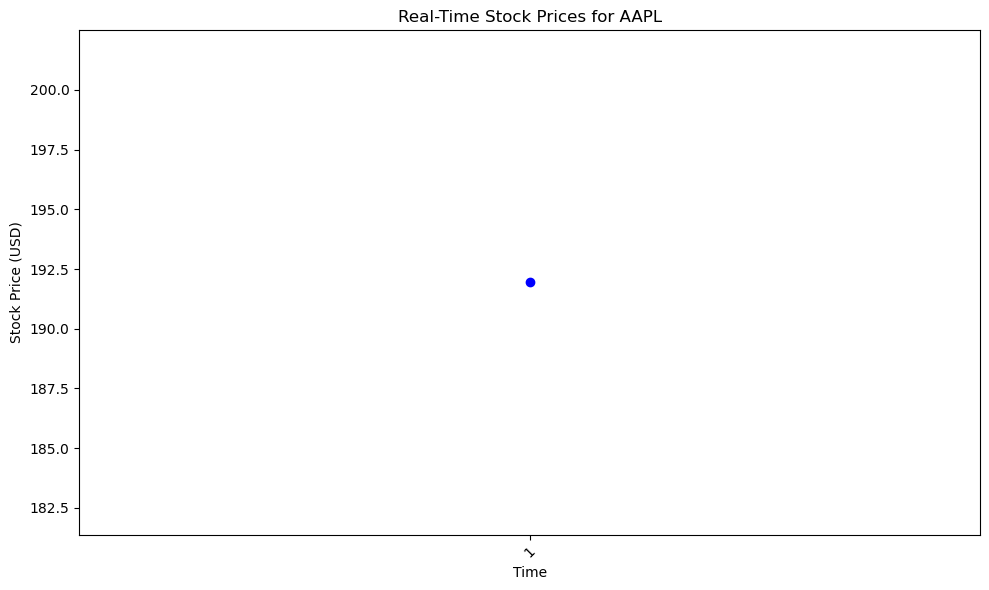

Real-Time Stock Price for AAPL: 191.94


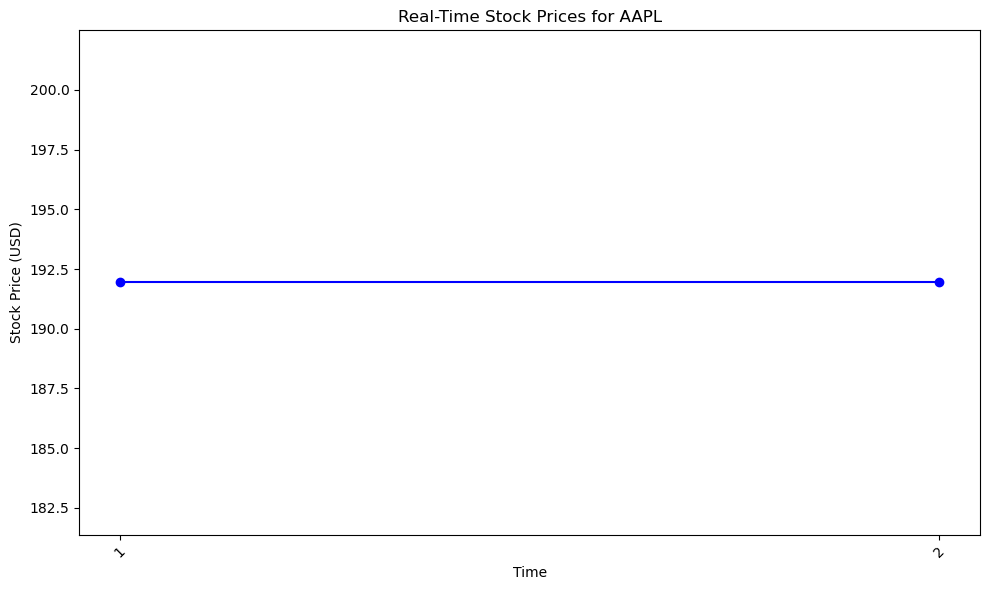

Real-Time Stock Price for AAPL: 191.94


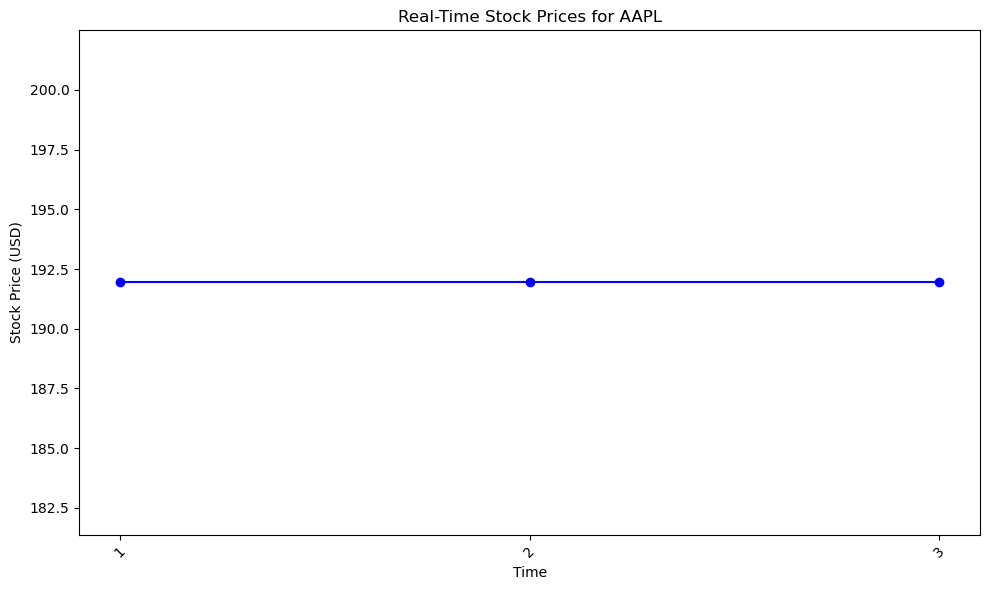

KeyboardInterrupt: 

In [13]:
# Keep historical data for the last 50 data points
MAX_HISTORY_LENGTH = 50
historical_data = []

def get_stock_data():
    endpoint = f'{BASE_URL}?function=GLOBAL_QUOTE&symbol={STOCK}&apikey={API_KEY}'

    try:
        response = requests.get(endpoint)
        data = response.json()

        # Check if the response contains an error message
        if 'Note' in data:
            print(f'Error: {data["Note"]}')
            return None

        # Extract relevant stock data
        stock_data = data['Global Quote']
        price = float(stock_data['05. price'])

        # Append the current price to the historical data list
        historical_data.append(price)

        # If the historical data list exceeds the maximum length, remove the oldest entry
        if len(historical_data) > MAX_HISTORY_LENGTH:
            historical_data.pop(0)

        return price

    except requests.exceptions.RequestException as e:
        print(f'Error fetching data for {STOCK}: {e}')
        return None

def plot_stock_graph():
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(historical_data) + 1), historical_data, marker='o', linestyle='-', color='b')
    plt.xlabel('Time')
    plt.ylabel('Stock Price (USD)')
    plt.title(f'Real-Time Stock Prices for {STOCK}')
    plt.xticks(range(1, len(historical_data) + 1), rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    while True:
        stock_price = get_stock_data()

        if stock_price is not None:
            print(f'Real-Time Stock Price for {STOCK}: {stock_price}')

            # Plot the graph
            plot_stock_graph()

        # Auto-refresh every 10 seconds
        time.sleep(10)